# 3 - Chart salinities for a well

In [1]:
import dew_gwdata

db = dew_gwdata.sageodata()

This time we will nest the function calls:

In [2]:
df = db.salinities(  # this is a predefined query which will return all the salinity observations for the wells passed as an argument
    db.find_wells(
        "LKW039"
    )  # this returns a list containing one Well object, for LKW039
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 35 columns):
well_id              183 non-null object
dh_no                183 non-null int64
unit_long            183 non-null int64
unit_hyphen          183 non-null object
obs_no               183 non-null object
dh_name              183 non-null object
easting              183 non-null float64
northing             183 non-null float64
zone                 183 non-null int64
latitude             183 non-null float64
longitude            183 non-null float64
aquifer              183 non-null object
collected_date       183 non-null datetime64[ns]
tds                  181 non-null float64
ec                   181 non-null float64
ph                   34 non-null float64
sample_temp          4 non-null float64
sample_type          183 non-null object
series_type          183 non-null object
anomalous_ind        183 non-null object
test_place           98 non-null object
extract_method       178 

Let's see what kind of different sample extraction methods have been used:

In [4]:
df.groupby("extract_method").collected_date.agg(["count", "min", "max"])

,count,min,max
extract_method,,,
BAIL,150,1985-03-18,2013-11-20
PUMP,28,1985-03-25,2016-04-18


So it has mostly been bailed, but there are pumped samples, and the pumped samples are more recent too.

Let's make a chart.

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Make the default plots bigger!
%matplotlib inline
plt.rcParams["figure.dpi"] = 120

E:\Telemetry\kinverarity\Anaconda3\envs\dev\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


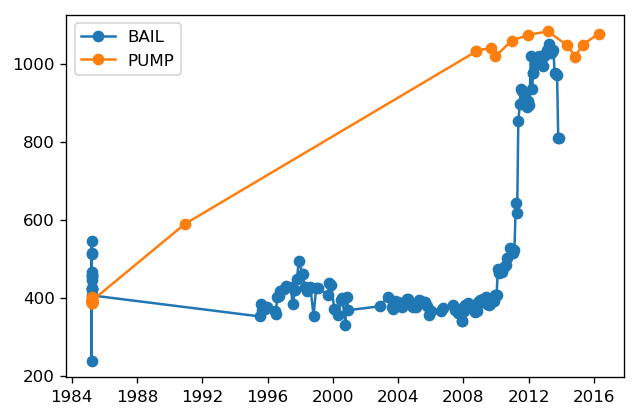

In [7]:
fig, ax = plt.subplots()

for method, group_df in df.groupby("extract_method"):

    # Sort by date:
    group_df = group_df.sort_values("collected_date")

    # Label the line by the extraction_method
    ax.plot(group_df.collected_date, group_df.tds, marker="o", label=method)

ax.legend()

In [8]:
# Ignore this cell! It's just here so that you can see the figure on Gitea.
fig.savefig("nb3_fig1.png")

![](http://envtelem04:3000/groundwater/dew_gwdata/raw/branch/master/notebooks/nb3_fig1.png)